# Composites saisonniers

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath

In [2]:
dir_data='./data/'
dir_res='./result/'
dir_figs='./figs/'

In [3]:
cmap1='jet'
cmap2='RdBu_r'
cmap3='BrBG'
projection2=ccrs.NearsidePerspective(central_longitude=5.0, central_latitude=55.0)
bounds = [(-20, 30, 30, 80)]

def make_boundary_path(lon,lat):
    lons,lats=np.meshgrid(lon,lat)
    boundary_path = np.array([lons[-1,:],lats[-1,:]])
    boundary_path = np.append(boundary_path,np.array([lons[::-1,-1],lats[::-1,-1]]),axis=1)
    boundary_path = np.append(boundary_path,np.array([lons[1,::-1],lats[1,::-1]]),axis=1)
    boundary_path = np.append(boundary_path,np.array([lons[:,1],lats[:,1]]),axis=1)
    boundary_path = mpath.Path(np.swapaxes(boundary_path, 0, 1))
    return boundary_path

### Ouverture des données 

In [4]:
#récupérationde la série de clusters
with open(dir_res+'cluster.txt', 'r') as clstr :
    cluster = np.array([int(i) for i in clstr.readline().replace('\n','')])[:-365]
    Regimes = clstr.readline().replace("'",'').replace('[','').replace(']','').split(',')

In [5]:
d1='1980-01-01T09'
d2='2019-12-31T18'

#enlever 29 fev
dates = pd.date_range(d1, d2, freq='D')
jours = np.any([dates.day!=29,dates.month!=2],axis=0)
dates = dates[jours][15:-15]

DJF = np.any([dates.month==12,dates.month==1,dates.month==2],axis=0)
MAM = np.any([dates.month==3,dates.month==4,dates.month==5],axis=0)
JJA = np.any([dates.month==6,dates.month==7,dates.month==8],axis=0)
SON = np.any([dates.month==9,dates.month==10,dates.month==11],axis=0)

dates_DJF = dates[DJF]
dates_MAM = dates[MAM]
dates_JJA = dates[JJA]
dates_SON = dates[SON]

#wind speed norm
### changer le nom du fichier pour tracer t2m ou tp
data_DJF = xr.open_dataset(dir_data+'wind10_eur_19790101_20191231.nc').sel(time=dates_DJF)
data_MAM = xr.open_dataset(dir_data+'wind10_eur_19790101_20191231.nc').sel(time=dates_MAM)
data_JJA = xr.open_dataset(dir_data+'wind10_eur_19790101_20191231.nc').sel(time=dates_JJA)
data_SON = xr.open_dataset(dir_data+'wind10_eur_19790101_20191231.nc').sel(time=dates_SON)

lat = data_DJF.latitude.values
lon = data_DJF.longitude.values
time = data_DJF.time.values

In [6]:
# u & v components
data_u10_DJF = xr.open_dataset(dir_data+'u10_eur_19790101_20191231.nc').sel(time=dates_DJF)['u10']
data_u10_MAM = xr.open_dataset(dir_data+'u10_eur_19790101_20191231.nc').sel(time=dates_MAM)['u10']
data_u10_JJA = xr.open_dataset(dir_data+'u10_eur_19790101_20191231.nc').sel(time=dates_JJA)['u10']
data_u10_SON = xr.open_dataset(dir_data+'u10_eur_19790101_20191231.nc').sel(time=dates_SON)['u10']

data_v10_DJF = xr.open_dataset(dir_data+'v10_eur_19790101_20191231.nc').sel(time=dates_DJF)['v10']
data_v10_MAM = xr.open_dataset(dir_data+'v10_eur_19790101_20191231.nc').sel(time=dates_MAM)['v10']
data_v10_JJA = xr.open_dataset(dir_data+'v10_eur_19790101_20191231.nc').sel(time=dates_JJA)['v10']
data_v10_SON = xr.open_dataset(dir_data+'v10_eur_19790101_20191231.nc').sel(time=dates_SON)['v10']

### Calcul des anomalies saisonnières

In [7]:
data_DJF = data_DJF.groupby('time.dayofyear')
data_MAM = data_MAM.groupby('time.dayofyear')
data_JJA = data_JJA.groupby('time.dayofyear')
data_SON = data_SON.groupby('time.dayofyear')

In [8]:
data_anom_DJF = (data_DJF - data_DJF.mean('time')).groupby('time.dayofyear') / data_DJF.std('time')
anom_DJF = data_anom_DJF['ws']

data_anom_MAM = (data_MAM - data_MAM.mean('time')).groupby('time.dayofyear') / data_MAM.std('time')
anom_MAM = data_anom_MAM['ws']

data_anom_JJA = (data_JJA - data_JJA.mean('time')).groupby('time.dayofyear') / data_JJA.std('time')
anom_JJA = data_anom_JJA['ws']

data_anom_SON = (data_SON - data_SON.mean('time')).groupby('time.dayofyear') / data_SON.std('time')
anom_SON = data_anom_SON['ws']

### Récupération des clusters de chaque saison 

In [9]:
cluster_DJF=cluster[DJF]
cluster_MAM=cluster[MAM]
cluster_JJA=cluster[JJA]
cluster_SON=cluster[SON]

In [10]:
## RR


# levs_tp_anom = np.linspace(-1, 1, 21)

# for index, regime in enumerate(Regimes):

#     id_cluster1_DJF = np.any([cluster_DJF == index],axis=0)
#     mean_c1_anom_DJF = anom_DJF[id_cluster1_DJF,:,:].mean(axis=0)

#     id_cluster1_MAM = np.any([cluster_MAM == index],axis=0)
#     mean_c1_anom_MAM = anom_MAM[id_cluster1_MAM,:,:].mean(axis=0)

#     id_cluster1_JJA = np.any([cluster_JJA == index],axis=0)
#     mean_c1_anom_JJA = anom_JJA[id_cluster1_JJA,:,:].mean(axis=0)

#     id_cluster1_SON = np.any([cluster_SON == index],axis=0)
#     mean_c1_anom_SON = anom_SON[id_cluster1_SON,:,:].mean(axis=0)

#     nbr_c1 = sum(np.any([cluster == index], axis = 0))
#     pct_c1_DJF = round(sum(id_cluster1_DJF)*100/nbr_c1,2)
#     pct_c1_MAM = round(sum(id_cluster1_MAM)*100/nbr_c1,2)
#     pct_c1_JJA = round(sum(id_cluster1_JJA)*100/nbr_c1,2)
#     pct_c1_SON = round(sum(id_cluster1_SON)*100/nbr_c1,2)

#     fig = plt.figure(figsize=(15, 10))
#     fig.suptitle(f'Seasonnal composites of precipitation anomalies (ERA5 1979-2018)\n{regime}', fontsize=16)

#     ax = fig.add_subplot(2, 2, 1, projection=projection2)
#     ax.set_title(f'DJF : {pct_c1_DJF}%')
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_DJF, levels=levs_tp_anom, 
#                      cmap=cmap3, extend='both', transform=ccrs.PlateCarree())
#     ax.clabel(cf, inline=1, fmt='%4.0f', fontsize=10)
#     cb = fig.colorbar(cf, orientation='vertical', aspect=65, shrink=1, pad=0.05, extendrect='True')
#     cb.set_label('Anomaly (mm/day)', fontsize=12)

#     ax = fig.add_subplot(2, 2, 2, projection=projection2)
#     ax.set_title(f'MAM : {pct_c1_MAM}%')
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_MAM, levels=levs_tp_anom, 
#                      cmap=cmap3, extend='both', transform=ccrs.PlateCarree())
#     ax.clabel(cf, inline=1, fmt='%4.0f', fontsize=10)
#     cb = fig.colorbar(cf, orientation='vertical', aspect=65, shrink=1, pad=0.05, extendrect='True')
#     cb.set_label('Anomaly (mm/day)', fontsize=12)

#     ax = fig.add_subplot(2, 2, 3, projection=projection2)
#     ax.set_title(f'JJA : {pct_c1_JJA}%')
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_JJA, levels=levs_tp_anom, 
#                      cmap=cmap3, extend='both', transform=ccrs.PlateCarree())
#     ax.clabel(cf, inline=1, fmt='%4.0f', fontsize=10)
#     cb = fig.colorbar(cf, orientation='vertical', aspect=65, shrink=1, pad=0.05, extendrect='True')
#     cb.set_label('Anomaly (mm/day)', fontsize=12)

#     ax = fig.add_subplot(2, 2, 4, projection=projection2)
#     ax.set_title(f'SON : {pct_c1_SON}%')
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_SON, levels=levs_tp_anom, 
#                      cmap=cmap3, extend='both', transform=ccrs.PlateCarree())
#     ax.clabel(cf, inline=1, fmt='%4.0f', fontsize=10)
#     cb = fig.colorbar(cf, orientation='vertical', aspect=65, shrink=1, pad=0.05, extendrect='True')
#     cb.set_label('Anomaly (mm/day)', fontsize=12)

# #     plt.show()

#     fig.savefig(dir_figs+'z500_eu_tp_season_composite_'+regime+'.jpeg', bbox_inches='tight')

In [11]:
# #t2m

# levs_t_anom = np.linspace(-3, 3, 21)

# fig = plt.figure(figsize=(15, 10))
# fig.suptitle('Seasonnal composites of 2-meter temperature anomalies (ERA5 1979-2018)', fontsize=16)

# for index, regime in enumerate(Regimes):

#     id_cluster1_DJF = np.any([cluster_DJF == index],axis=0)
#     mean_c1_anom_DJF = anom_DJF[id_cluster1_DJF,:,:].mean(axis=0)

#     id_cluster1_MAM = np.any([cluster_MAM == index],axis=0)
#     mean_c1_anom_MAM = anom_MAM[id_cluster1_MAM,:,:].mean(axis=0)

#     id_cluster1_JJA = np.any([cluster_JJA == index],axis=0)
#     mean_c1_anom_JJA = anom_JJA[id_cluster1_JJA,:,:].mean(axis=0)

#     id_cluster1_SON = np.any([cluster_SON == index],axis=0)
#     mean_c1_anom_SON = anom_SON[id_cluster1_SON,:,:].mean(axis=0)

#     ax = fig.add_subplot(4, 7, index+1, projection=projection2)
#     ax.set_title(f'{regime}')
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_DJF, levels=levs_t_anom, 
#                      cmap=cmap2, extend='both', transform=ccrs.PlateCarree())

#     ax = fig.add_subplot(4, 7, index+8, projection=projection2)
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_MAM, levels=levs_t_anom, 
#                      cmap=cmap2, extend='both', transform=ccrs.PlateCarree())

#     ax = fig.add_subplot(4, 7, index+15, projection=projection2)
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_JJA, levels=levs_t_anom, 
#                      cmap=cmap2, extend='both', transform=ccrs.PlateCarree())

#     ax = fig.add_subplot(4, 7, index+22, projection=projection2)
#     ax.coastlines()
#     ax.set_extent(*bounds, crs=ccrs.PlateCarree())
#     boundary_path = make_boundary_path(lon, lat)
#     ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
#     cf = ax.contourf(lon, lat, mean_c1_anom_SON, levels=levs_t_anom, 
#                      cmap=cmap2, extend='both', transform=ccrs.PlateCarree())
    
# fig.text(0.11,0.8,'DJF', fontsize = 12)
# fig.text(0.11,0.6,'MAM', fontsize = 12)
# fig.text(0.11,0.4,'JJA', fontsize = 12)
# fig.text(0.11,0.2,'SON', fontsize = 12)

# cb_ax = fig.add_axes([0.95, 0.1, 0.01, 0.8])
# cb = plt.colorbar(cf, cax=cb_ax, orientation='vertical', aspect=65, shrink=1, pad=0.05)
# cb.set_label('Anomaly (°C)', fontsize=12)
# plt.show()

# fig.savefig(dir_figs+'z500_eu_t2m_season_composite_summary.jpeg', bbox_inches='tight')

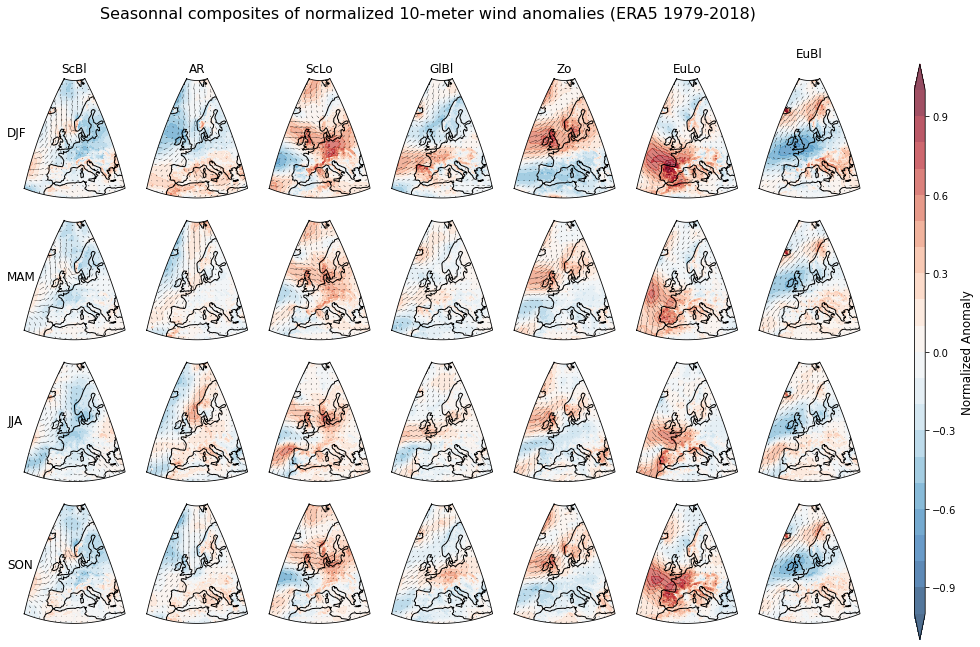

In [12]:
#vent

levs_wind10_anom = np.linspace(-1, 1, 21)

fig = plt.figure(figsize=(15, 10))
fig.suptitle(f'Seasonnal composites of normalized 10-meter wind anomalies (ERA5 1979-2018)', fontsize=16)

for index, regime in enumerate(Regimes):

    id_cluster1_DJF = np.any([cluster_DJF == index],axis=0)
    mean_c1_anom_DJF = anom_DJF[id_cluster1_DJF,:,:].mean(axis=0)
    mean_c1_u10_DJF = np.array(data_u10_DJF[id_cluster1_DJF,:,:].mean(axis=0))
    mean_c1_v10_DJF = np.array(data_v10_DJF[id_cluster1_DJF,:,:].mean(axis=0))

    id_cluster1_MAM = np.any([cluster_MAM == index],axis=0)
    mean_c1_anom_MAM = anom_MAM[id_cluster1_MAM,:,:].mean(axis=0)
    mean_c1_u10_MAM = np.array(data_u10_MAM[id_cluster1_MAM,:,:].mean(axis=0))
    mean_c1_v10_MAM = np.array(data_v10_MAM[id_cluster1_MAM,:,:].mean(axis=0))

    id_cluster1_JJA = np.any([cluster_JJA == index],axis=0)
    mean_c1_anom_JJA = anom_JJA[id_cluster1_JJA,:,:].mean(axis=0)
    mean_c1_u10_JJA = np.array(data_u10_JJA[id_cluster1_JJA,:,:].mean(axis=0))
    mean_c1_v10_JJA = np.array(data_v10_JJA[id_cluster1_JJA,:,:].mean(axis=0))

    id_cluster1_SON = np.any([cluster_SON == index],axis=0)
    mean_c1_anom_SON = anom_SON[id_cluster1_SON,:,:].mean(axis=0)
    mean_c1_u10_SON = np.array(data_u10_SON[id_cluster1_SON,:,:].mean(axis=0))
    mean_c1_v10_SON = np.array(data_v10_SON[id_cluster1_SON,:,:].mean(axis=0))


    ax = fig.add_subplot(4, 7, index+1, projection=projection2)
    ax.set_title(f'{regime}')
    ax.coastlines()
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())
    boundary_path = make_boundary_path(lon, lat)
    ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
    ax.quiver(lon, lat, mean_c1_u10_DJF, mean_c1_v10_DJF, transform=ccrs.PlateCarree(), regrid_shape = 20, zorder = 2)
    cf = ax.contourf(lon, lat, mean_c1_anom_DJF, levels=levs_wind10_anom, 
                 cmap=cmap2, alpha = 0.7, extend='both', transform=ccrs.PlateCarree(), zorder = 1)

    ax = fig.add_subplot(4, 7, index+8, projection=projection2)
    ax.coastlines()
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())
    boundary_path = make_boundary_path(lon, lat)
    ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
    ax.quiver(lon, lat, mean_c1_u10_MAM, mean_c1_v10_MAM, transform=ccrs.PlateCarree(), regrid_shape = 20, zorder = 2)
    cf = ax.contourf(lon, lat, mean_c1_anom_MAM, levels=levs_wind10_anom, 
                 cmap=cmap2, alpha = 0.7, extend='both', transform=ccrs.PlateCarree(), zorder = 1)

    ax = fig.add_subplot(4, 7, index+15, projection=projection2)
    ax.coastlines()
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())
    boundary_path = make_boundary_path(lon, lat)
    ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
    ax.quiver(lon, lat, mean_c1_u10_JJA, mean_c1_v10_JJA, transform=ccrs.PlateCarree(), regrid_shape = 20, zorder = 2)
    cf = ax.contourf(lon, lat, mean_c1_anom_JJA, levels=levs_wind10_anom, 
                 cmap=cmap2, alpha = 0.7, extend='both', transform=ccrs.PlateCarree(), zorder = 1)

    ax = fig.add_subplot(4, 7, index+22, projection=projection2)
    ax.coastlines()
    ax.set_extent(*bounds, crs=ccrs.PlateCarree())
    boundary_path = make_boundary_path(lon, lat)
    ax.set_boundary(boundary_path, transform=ccrs.PlateCarree())
    ax.quiver(lon, lat, mean_c1_u10_SON, mean_c1_v10_SON, transform=ccrs.PlateCarree(), regrid_shape = 20, zorder = 2)
    cf = ax.contourf(lon, lat, mean_c1_anom_SON, levels=levs_wind10_anom, 
                 cmap=cmap2, alpha = 0.7, extend='both', transform=ccrs.PlateCarree(), zorder = 1)

fig.text(0.11,0.8,'DJF', fontsize = 12)
fig.text(0.11,0.6,'MAM', fontsize = 12)
fig.text(0.11,0.4,'JJA', fontsize = 12)
fig.text(0.11,0.2,'SON', fontsize = 12)

cb_ax = fig.add_axes([0.95, 0.1, 0.01, 0.8])
cb = plt.colorbar(cf, cax=cb_ax, orientation='vertical', aspect=65, shrink=1, pad=0.05)
cb.set_label('Normalized Anomaly', fontsize=12)
plt.show()

fig.savefig(dir_figs+'z500_eu_v_season_composite_summary.jpeg', bbox_inches='tight')